In [1]:
pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from tensorflow import  keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
data=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
type(data)

tuple

In [ ]:
(x_train,y_train),(x_test,y_test)=data

In [ ]:
len(data),len(x_train),len(x_test)

(2, 60000, 10000)

In [ ]:
x_train.shape,x_train[0].shape

((60000, 28, 28), (28, 28))

In [ ]:
x_train[0];

5

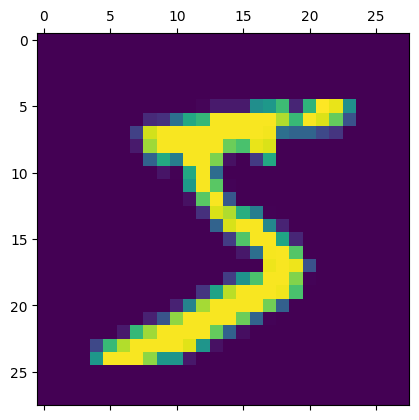

In [ ]:
plt.matshow(x_train[0])
y_train[0]

In [ ]:
x_train_flaten=x_train.reshape(len(x_train),-1)
x_train_flaten.shape

(60000, 784)

In [ ]:
x_test_flaten=x_test.reshape(len(x_test),-1)
x_test_flaten.shape

(10000, 784)

In [ ]:
x_train_flaten[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
# Sequential means we are having a stack of layers in nueral network
# as it is a stack it will accept every layer as one element
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    # categorical as the data is categorical in nature 0-9 we have 10 categories in our class
    # sparce is for output (y_train) veriable which is an integer number
    # if it is  one hot encoded array then we would have used categorical entropy
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
# actual traning of the data
model.fit(x_train_flaten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.9894 - accuracy: 0.8385
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 6.1081 - accuracy: 0.8787
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.6458 - accuracy: 0.8835
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.6733 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.2767 - accuracy: 0.8869


In [ ]:
# Eveoulating tthe accuracy of the model
model.evaluate(x_test_flaten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 5.3741 - accuracy: 0.8925


[5.3740973472595215, 0.8924999833106995]

In [ ]:
# as we can see the acuracy is not very grate so we will acale down the data
x_train=x_train / 255
x_test=x_test / 255
x_train_flaten=x_train.reshape(len(x_train),-1)
x_test_flaten=x_test.reshape(len(x_test),-1)
model1=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model1.fit(x_train_flaten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4681 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3035 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2729 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9254


In [ ]:
x_test_flaten.max()

1.0

In [ ]:
# Eveoulating tthe accuracy of the model
model1.evaluate(x_test_flaten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2752 - accuracy: 0.9226


[0.27521631121635437, 0.9225999712944031]

In [ ]:
y_predicted=model1.predict(x_test_flaten)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.4411049e-02, 4.0146824e-07, 4.9545273e-02, 9.5891285e-01,
       1.6284768e-03, 1.3691440e-01, 1.5323139e-06, 9.9982536e-01,
       1.4297597e-01, 7.0116925e-01], dtype=float32)

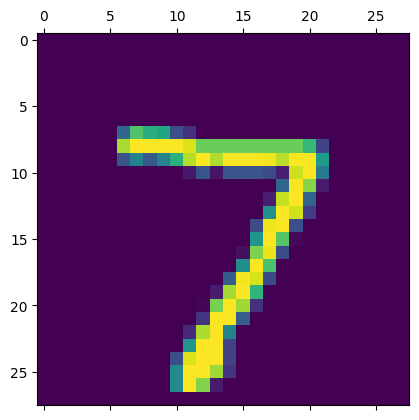

In [ ]:
plt.matshow(x_test[0])

In [ ]:
## np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_label=[np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [ ]:
## Defining the confuession matrix
# cm stands for confuession matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    0,    2,    0,    5,    9,    3,    5,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   4,    9,  891,   23,    6,    4,   13,   11,   67,    4],
       [   2,    0,   10,  921,    0,   21,    3,   10,   35,    8],
       [   1,    1,    2,    2,  893,    0,   14,    4,   12,   53],
       [   8,    3,    1,   32,    6,  762,   17,    7,   50,    6],
       [   9,    3,    4,    1,    7,   11,  915,    2,    6,    0],
       [   1,    6,   21,    8,    4,    0,    0,  948,    4,   36],
       [   4,    6,    5,   15,    8,   16,    9,    8,  897,    6],
       [   9,    6,    1,    8,   16,    5,    0,   17,   14,  933]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Trught')

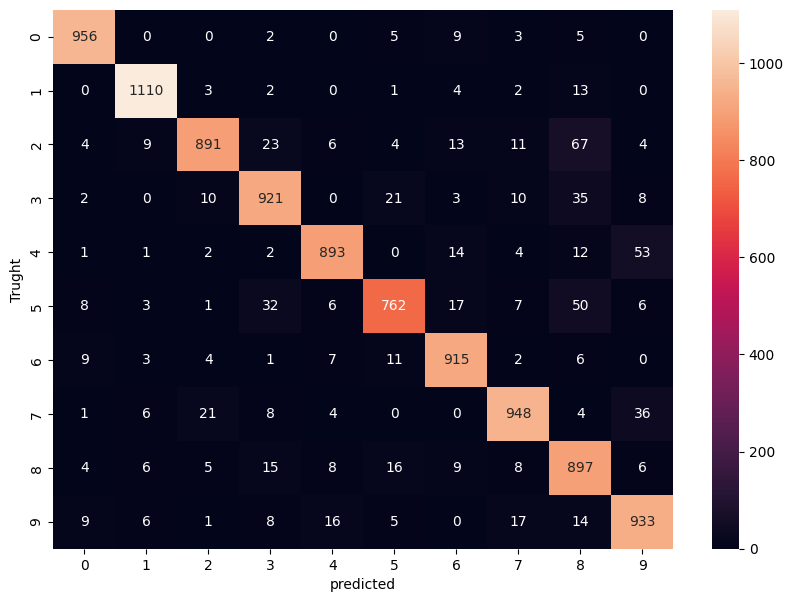

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Trught')

#### using hidden layer

In [ ]:
model=keras.Sequential([
    # 100 represents the number of nueral connections we wnat in the hidden layer for now we are using the hit and trail method

    keras.layers.Dense(100,input_shape=(28*28,), activation='relu'),
    # 10 number of output veriables in in nueral network
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flaten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2723 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0657 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0521 - accuracy: 0.9844


In [ ]:
model.evaluate(x_test_flaten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0757 - accuracy: 0.9773


[0.07573843747377396, 0.9772999882698059]

313/313 [==============================] - 0s 1ms/step


<Axes: >

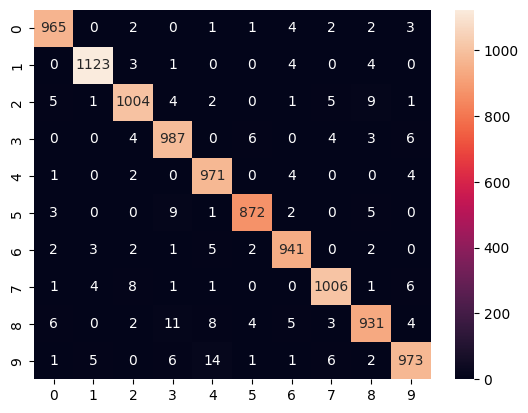

In [ ]:
y_predicted=model.predict(x_test_flaten)
y_predicted_label=[np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)

plt.Figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')

#### using tgheflatten layer so that we wont have to call input .reshape on the input dataset

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    # No need to mention the if the array is array is flattened using the keras
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2771 - accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1249 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0858 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0401 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0331 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0278 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0222 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0818 - accuracy: 0.9762


[0.08176825195550919, 0.9761999845504761]

In [ ]:
# insted of optimizer we can use diffrent types of optimizers it can be SGD  or any other

In [ ]:
## using the tenserbord for the performance metric visulation
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    # No need to mention the if the array is array is flattened using the keras
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=10,callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2764 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1258 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0888 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0675 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0526 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0434 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0350 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0290 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.021

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [ ]:
model.get_weights()

[array([[-0.03594202,  0.00329114,  0.00847228, ..., -0.05880479,
          0.04173025,  0.08093043],
        [-0.05543912, -0.0431064 ,  0.0098431 , ...,  0.0738803 ,
         -0.06511115,  0.03462053],
        [-0.04516009,  0.00547563,  0.02319445, ...,  0.08224438,
          0.07254922,  0.01434167],
        ...,
        [ 0.04694657,  0.04735525, -0.01771263, ...,  0.07666208,
          0.04932594,  0.05934392],
        [-0.07412779,  0.00662097, -0.05390298, ..., -0.05755065,
          0.0383705 , -0.04893084],
        [-0.04889281,  0.06391846,  0.07437688, ..., -0.00318012,
          0.057942  , -0.01513905]], dtype=float32),
 array([-4.19190824e-02,  2.46220574e-01,  6.40202761e-02,  1.85519382e-02,
        -4.25168388e-02, -2.15815395e-01,  2.78529320e-02, -1.09866321e-01,
         1.18432887e-01,  2.32050642e-01, -1.87539592e-01, -8.33983868e-02,
        -1.67735703e-02, -1.53084993e-01, -1.72256768e-01, -3.84767912e-02,
         1.25608876e-01,  2.44381458e-01, -2.65980307e

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.test.is_built_with_cuda()

True